In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as: tensorflow_datasets.load('mnist')
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/_DataSet.py from tensorflow/models.


In [4]:
mist= mnist

In [5]:
mist

_Datasets(train=<tensorflow.examples.tutorials.mnist.input_data._DataSet object at 0x0000020AFFA6C688>, validation=<tensorflow.examples.tutorials.mnist.input_data._DataSet object at 0x0000020A89D4E388>, test=<tensorflow.examples.tutorials.mnist.input_data._DataSet object at 0x0000020A88A62BC8>)

In [6]:
mist.train.images.shape, mist.train.labels.shape

((55000, 784), (55000, 10))

In [7]:
 mist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [8]:
mist.validation.images.shape

(5000, 784)

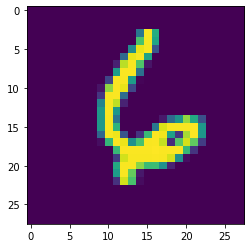

In [9]:
first_image = mist.train.images[54000]
first_image = np.array(first_image, dtype='float')
first_image = first_image.reshape((28,28))
plt.imshow(first_image)
plt.show()

In [10]:
inputs = 784
hidden1 = 256
hidden2 = 256
classes = 10
weights = {
    'h1' : tf.Variable(tf.random_normal([inputs,hidden1])),
    'h2' : tf.Variable(tf.random_normal([hidden1,hidden2])),
    'out' : tf.Variable(tf.random_normal([hidden2,classes]))
}

bias = {
    'h1' : tf.Variable(tf.random_normal([hidden1])),
    'h2' : tf.Variable(tf.random_normal([hidden2])),
    'out' : tf.Variable(tf.random_normal([classes]))
}

In [11]:
def forprop(x, weihgts,biases):
    layer1 = tf.add(tf.matmul(x,weights['h1']),biases['h1'])
    output_layer1 = tf.nn.relu(layer1)
    
    layer2 = tf.add(tf.matmul(output_layer1,weights['h2']),biases['h2'])
    output_layer2 = tf.nn.relu(layer2)
    
    finalout = tf.add(tf.matmul(output_layer2,weights['out']),biases['out'])
    return finalout

In [12]:
x = tf.placeholder("float", [None, inputs])
y = tf.placeholder(tf.int32, [None, classes])
pred = forprop(x,weights,bias)

In [13]:
cost = tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [14]:
optimizer = tf.train.AdamOptimizer(learning_rate = 0.01)
optimize = optimizer.minimize(cost)

In [15]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [20]:
batch = 100
for i in range (40):
    num_batches = int(mist.train.num_examples/batch)
    total_cost = 0
    for j in range(num_batches):
        batch_x, batch_y = mist.train.next_batch(batch)
        c, _ = sess.run([cost,optimize], feed_dict = {x:batch_x, y:batch_y})
        total_cost+=c
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [21]:
predictions = tf.argmax(pred,1)
correct = tf.argmax(y,1)
correctpreds = tf.equal(predictions,correct)
prediction, correct_predictions = sess.run([predictions,correctpreds], feed_dict = {x:mist.test.images, y:mist.test.labels})

In [22]:
correct_predictions.sum()

9663

In [23]:
accuracy = correct_predictions.sum()/10000
accuracy

0.9663